In this notebook, we train a model to learn a strategy for Blackjack using a decision tree regression.

Below we write an `actionpicker` function that decides what `action` to play given the `observation` from the Blackjack simulator, `env`.
`epsilon` percent of the time, we decide on a random `action`.

We also write a `train` function fits our decision tree regression to our `dat` and `labs`.

In [1]:
def actionpicker(clf, env, observation, epsilon):
  if clf == 0:
    action = env.action_space.sample()
  else:
    pred = clf.predict([observation + (0,), observation + (1,)])
    action = 1*(pred[1]>pred[0])
  if random.random() < epsilon:
    action = env.action_space.sample()
  return(action)

def train(dat, lab):
  clf = tree.DecisionTreeRegressor(max_leaf_nodes = 6)
  clf = clf.fit(dat, lab)
  return(clf)

In the next code block, we train our Blackjack playing model and visualize the descision tree regression we have learned.  We will train our model 5 times, playing 100,000 rounds, and print the number of rounds it won each time.

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


28345
41355
37486
38152
37907


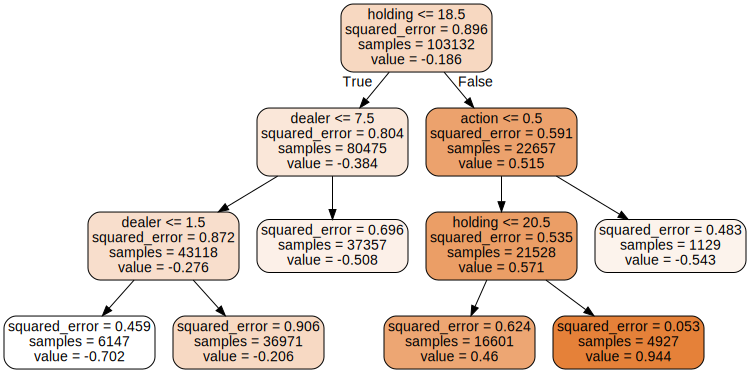

In [3]:
# action 0 is stay
# action 1 is hit

import gym
import graphviz
from sklearn import tree
import random

env = gym.make("Blackjack-v1")
epochs = 5
N = 100000
epsilon = 0.1
clf = 0

for epoch in range(epochs):
  dat = []
  lab = []
  wins = 0
  for _ in range(N):
    done = False
    observation = env.reset()
    while not done:
      # pick an action
      action = actionpicker(clf, env, observation, epsilon)

      dat += [observation + (action,)]
      observation, reward, done, info = env.step(action)
      if done:
        target = reward
      elif epoch == 0:
        target = 0
      else:
        pred = clf.predict([observation + (0,), observation + (1,)])
        target = max(pred)
      lab += [target]
      if reward > 0.0: wins += 1
  clf = train(dat, lab)

  dot_data = tree.export_graphviz(clf, # class_names = [-1, 0, 1],
                                feature_names = ["holding", "dealer", "ace", "action"], filled=True, rounded=True)
  graph = graphviz.Source(dot_data)
  env.close()
#  print(dat)
  print(wins)
graph